В `pandas` можно считать данные разных форматов, например: `excel`, `sql`, `fwf`, `html`, `json`. Чтобы узнать весь перечень доступных форматов достаточно прописать `read_` и нажать `Tab`, тогда появятся все методы для чтения данных.

Вывод `jupyter notebook` и вывод с помощью функции `print()` - различны, лучше использовать вывод `jupyter`.

`Data frame`-ы можно создавать из `python`-овских объектов, например из словаря при помощи метода класса `DataFrame`  `.from_dict()`. Стобцами будут являться столбцы, их значениями - значения словаря.

In [1]:
import pandas as pd

example_dictionary = {"Column_one": [1, 2, 3,], "Column_two": [3, 2, 1]}

data_frame = pd.DataFrame.from_dict(example_dictionary)

In [2]:
data_frame

,Column_one,Column_two
0,1,3
1,2,2
2,3,1


Существуют методы преобразующие данные из `data frame` в файлы других форматов.

In [3]:
data_frame.to_csv('tmp.csv')

Существует метод `data frame`-а для получения общей информации об объекте - `.info()`.

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Column_one  3 non-null      int64
 1   Column_two  3 non-null      int64
dtypes: int64(2)
memory usage: 176.0 bytes


Чтобы узнать размер `data frame`-а стоит использовать атрибут `shape`, который обозначает количество строк и количество колонок.

In [5]:
data_frame.shape

(3, 2)

Атрибут `columns` возвращает названия всех колонок.

In [6]:
data_frame.columns

Index(['Column_one', 'Column_two'], dtype='object')

Чтобы узнать типы столбцов стоит использовать атрибут `.dtypes`.

In [7]:
data_frame.dtypes

Column_one    int64
Column_two    int64
dtype: object

Чтобы обратиться к столбцу `data` `frame`-а стоит использовать название стобца как индекс, тогда мы будем работать уже со `series`.

In [8]:
data_frame["Column_one"]

0    1
1    2
2    3
Name: Column_one, dtype: int64

Чтобы использовать несколько столбцов, то стоит в двойных квадратных скобках указать все интересующие нас столбцы. Выводятся столбцы в том порядке, в котором мы указали в скобках.

In [9]:
data_frame[["Column_one", "Column_two"]]

,Column_one,Column_two
0,1,3
1,2,2
2,3,1


In [10]:
data_frame.iloc[: 2, : 1]

,Column_one
0,1
1,2


В `pandas`-е удобно использовать булевые маски.

In [11]:
data_frame[data_frame["Column_one"] >= 2]

,Column_one,Column_two
1,2,2
2,3,1


Также удобно использовать метод `.isin()`, чтобы определять, находится ли значение нашего экземпляра в множестве.

In [12]:
data_frame[data_frame["Column_one"].isin([1, 2])]

,Column_one,Column_two
0,1,3
1,2,2


Ещё один удобный способ сочетания булевых условий.

In [13]:
data_frame[ (data_frame["Column_one"] == 1) | (data_frame["Column_one"] == 2)]

,Column_one,Column_two
0,1,3
1,2,2


Чтобы проверить для каждой строки наличие значение удобно использовать метод `.notna()`.

In [14]:
data_frame["Column_one"].notna()

0    True
1    True
2    True
Name: Column_one, dtype: bool

Противоположный метод по функционалу `.isnan()`.

In [15]:
data_frame["Column_one"].isna().sum()

0

Для вывода значений при работе с маской стоит использовать метод `.loc()`.

Для компирования `data frame`-а удобно использовать метод `.copy()`. Если стоит копировать не ссылку, а саму структуру даных, то стоит указать значение аргумента `deep=` как `True`.

In [16]:
data_frame_two = data_frame.copy(deep = True)

data_frame_two

,Column_one,Column_two
0,1,3
1,2,2
2,3,1


Для соединения `data frame`-ов удобно использовать метод `.concat()`.

In [17]:
result_data_frame = pd.concat([data_frame, data_frame_two])

result_data_frame

,Column_one,Column_two
0,1,3
1,2,2
2,3,1
0,1,3
1,2,2
2,3,1


Чтобы объединить `data frame`-ы по стобцам стоит использовать дополнительный параметр `axis = 1`.

In [18]:
result_data_frame = pd.concat([data_frame, data_frame_two], axis = 1)

result_data_frame

,Column_one,Column_two,Column_one,Column_two
0,1,3,1,3
1,2,2,2,2
2,3,1,3,1


`Data frame`-ы можно `join`-ить как в `sql` при помощи метода `.merge()`.

In [28]:
temporary_data_frame = pd.DataFrame(index = data_frame.index) # Создаём пустой data frame той же размерности.

temporary_data_frame["Column_one"] = data_frame["Column_one"] # Колонна, по которой будет производится join.

temporary_data_frame["Is_even"] = data_frame["Column_one"].apply(lambda x: x % 2 == 0)

pd.merge(data_frame, temporary_data_frame, how = "inner") # Cам join.

,Column_one,Column_two,Is_even
0,1,3,False
1,2,2,True
2,3,1,False


Метод для подсчёта всех строчек `.count()`.

In [32]:
data_frame.count()

data_frame["Column_one"].count()

3

Метод для подсчёта среднего значение `.mean()`.

In [33]:
data_frame.mean()

Column_one    2.0
Column_two    2.0
dtype: float64

Метод получения медианы `.median()`.

In [35]:
data_frame.median()

Column_one    2.0
Column_two    2.0
dtype: float64

Чтобы получить полную статистику о `data frame`-е стоит использовать метод `.describe()`.

In [36]:
data_frame.describe()

,Column_one,Column_two
count,3.0,3.0
mean,2.0,2.0
std,1.0,1.0
min,1.0,1.0
25%,1.5,1.5
50%,2.0,2.0
75%,2.5,2.5
max,3.0,3.0


Для расчёта данных для определённой группы удобно использовать метод `.groupby()`.

In [39]:
data_frame.groupby("Column_one")["Column_two"].mean()

Column_one
1    3.0
2    2.0
3    1.0
Name: Column_two, dtype: float64

Метод `.agg()` принимает список агрегатных функций, которые стоит посчитать.

In [42]:
data_frame.groupby("Column_one")["Column_two"].agg("mean", "median")

Column_one
1    3.0
2    2.0
3    1.0
Name: Column_two, dtype: float64

Удобный метод `.value_count()`, который считает количество различных значений серии.

In [45]:
data_frame["Column_one"].value_counts()

1    1
2    1
3    1
Name: Column_one, dtype: int64

Существует метод показывающий попарную корреляцию `.corr()`.

In [46]:
data_frame.corr()

,Column_one,Column_two
Column_one,1.0,-1.0
Column_two,-1.0,1.0


Для визуализации серии стоит использовать метод `.plot()`.

<Axes: ylabel='Frequency'>

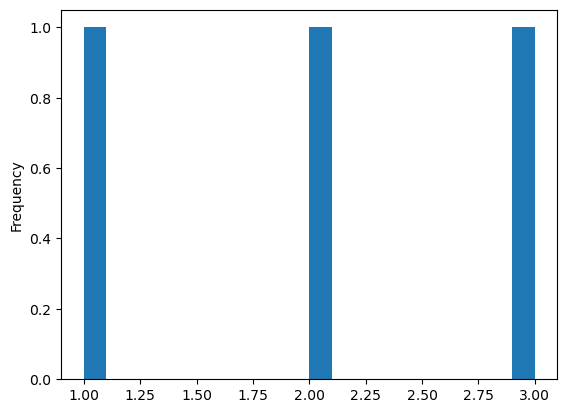

In [51]:
data_frame["Column_one"].plot(kind = "hist", bins = 20) # hist - тип графика, bins - количество столбцов.

Чтобы получить тип распределения нужно указать в аргументах метода тип графика `kde`.

<Axes: ylabel='Density'>

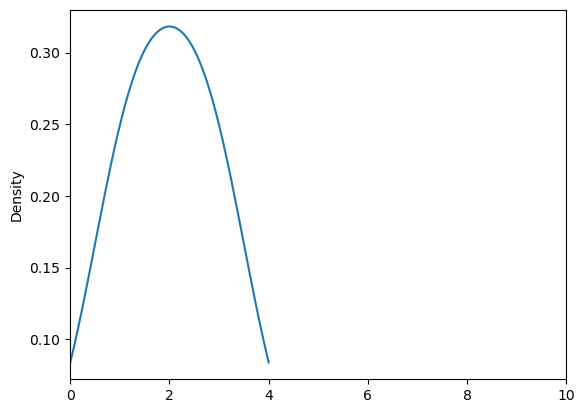

In [55]:
data_frame["Column_one"].plot(kind = "kde", xlim = [0, 10])

Значения `series` можно задать статически.

In [57]:
data_frame["Column_one"] = 1

data_frame

,Column_one,Column_two
0,1,3
1,1,2
2,1,1


Создать колонну можно при помощи булевый маски.

In [60]:
data_frame["Is_bigger_then_one"] = data_frame["Column_one"] > 1

data_frame

,Column_one,Column_two,Is_bigger_then_one
0,1,3,False
1,1,2,False
2,1,1,False


Чтобы переименовывать названия столбцов стоит использовать метод `.rename()`.

In [62]:
data_frame.rename(columns = {"Column_one": "First"})

,First,Column_two,Is_bigger_then_one
0,1,3,False
1,1,2,False
2,1,1,False


Чтобы переименовать все названия в нижний регистр.

In [68]:
data_frame.rename(columns = str.lower)

data_frame

,Column_one,Column_two,Is_bigger_then_one
0,1,3,False
1,1,2,False
2,1,1,False
